# Neural Networks - intro
## Part 1 - XOR
1. Using the XOR dataset below, train (400 epochs) a neural network (NN) using 2, 3, 4, and 5 hidden layers (where each layer has only 2 neurons). For each n layers, store the resulting accuracy along with n. Plot the results to find what the optimal number of layers is.
2. Repeat the above with 3 neurons in each Hidden layers. How do these results compare to the 2 neuron layers?
3. Repeat the above with 4 neurons in each Hidden layers. How do these results compare to the 2 and 3 neuron layers?
3. Using the most optimal configuraion (n-layers, k-neurons per layer), compare how `tanh`, `sigmoid`,`softplus` and `relu` effect the loss after 400 epochs. Try other Activation functions as well (https://keras.io/activations/)
4. Again with the most optimal setup, try other optimizers (instead of `SGD`) and report on the loss score. (https://keras.io/optimizers/)

## Part 2 - BYOD (Bring your own Dataset)
Using your own dataset, experiment and find the best Neural Network configuration. 
You may use any resource to improve results, just reference it.

While you may use any dataset, I'd prefer you didn't use the diabetes dataset used in the lesson.

https://stackoverflow.com/questions/34673164/how-to-train-and-tune-an-artificial-multilayer-perceptron-neural-network-using-k

https://keras.io/

#### Additional Keras Activation functions

https://keras.io/api/layers/activations/

__softmax__
__softsign__
__selu__
__elu__
__exponential__
__leaky_relu__
__relu6__
__silu__
__hard_silu__
__gelu__
__hard_sigmoid__
__linear__
__mish__
__log_softmax__

In [1]:

loss_funcs = ['mean_squared_error', 'mean_absolute_error', 'mean_absolute_percentage_error', 'mean_squared_logarithmic_error', 'squared_hinge', 'hinge', 'categorical_hinge', 'logcosh', 'categorical_crossentropy', 'sparse_categorical_crossentropy', 'binary_crossentropy', 'kullback_leibler_divergence', 'poisson', 'cosine_proximity']


In [2]:
#!pip3 install tensorflow keras

ERROR: Could not find a version that satisfies the requirement tensorflow (from versions: none)
ERROR: No matching distribution found for tensorflow


In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD  #Stochastic Gradient Descent

import numpy as np
# fix random seed for reproducibility
np.random.seed(7)

import matplotlib.pyplot as plt
%matplotlib inline

## Part 1 - XOR

Start by creating XOR dataset for analysis

In [3]:
n = 40
xx = np.random.random((n,1))
yy = np.random.random((n,1))

In [4]:
X = np.array([np.array([xx,-xx,-xx,xx]),np.array([yy,-yy,yy,-yy])]).reshape(2,4*n).T
y = np.array([np.ones([2*n]),np.zeros([2*n])]).reshape(4*n)

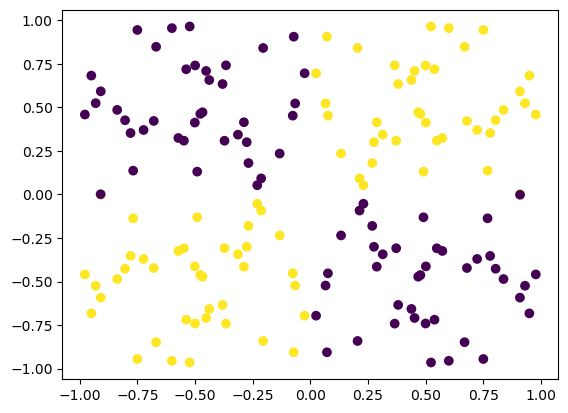

In [5]:
plt.scatter(*zip(*X), c=y)

This section is based on the original code provided by the assignment. This is retained here as a validation of the basic process for running a Sequential NN.

In [ ]:
model = Sequential()

model.add(Dense(2, input_dim=2, activation='tanh'))  #sigmoid, relu
# model.add(Dense(2, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
# model.add(Dense(1,input_dim=2, activation='sigmoid'))


sgd = SGD(learning_rate=0.1)
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

model.fit(X, y, batch_size=2, epochs=400) #160/4 = 40 per epoch

# Use this to print the output predictions
#print(model.predict(X).reshape(4*n))

In [21]:
scores = model.evaluate(X, y)
# scores, model.metrics_names

#print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
acc_score = scores[1]*100
print("Accuracy: %.2f%%" % (acc_score))


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4614 - loss: 0.4869     
Accuracy: 59.38%


#### Varying Number of Hidden Layers with 2 Nodes

With the process validated above, we can begin a loop evaluation to check accuracy scores based on varying number of hidden layers.

In [6]:
# Array of number of layers
num_layers = [1,2,3,4,5]
# empty array to receive accuracy scores
scores = []

# Define our optimizer
sgd = SGD(learning_rate=0.1)

# Loop through the number of layers and for each number of layers,
# build a model and evaluate it. Append the accuracy score to the scores array.
for num_layer in num_layers:
    # Create a new model
    model = Sequential()
    # Add the first layer with 2 nodes based on input dimensions
    model.add(Dense(2, input_dim=2, activation='tanh'))
    
    # Add layers based on the num_layer variable
    for _ in range(num_layer-1):
        model.add(Dense(2, activation='tanh'))
    
    # Add the output layer
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
    model.fit(X, y, batch_size=2, epochs=400)
    
    # evaluate scores
    model_scores = model.evaluate(X, y)
    # Append accuracy to array
    scores.append(model_scores[1]*100)

c:\Users\jomors\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/400
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 836us/step - accuracy: 0.5060 - loss: 0.7359
Epoch 2/400
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5590 - loss: 0.7193
Epoch 3/400
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6348 - loss: 0.6904
Epoch 4/400
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6320 - loss: 0.7029
Epoch 5/400
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6394 - loss: 0.6750
Epoch 6/400
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6008 - loss: 0.6808
Epoch 7/400
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7249 - loss: 0.6380
Epoch 8/400
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6547 - loss: 0.6458
Epoch 9/400
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5893 - loss: 0.6670
Epoch 10/400
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6180 - loss: 0.6689
Epoch 11/400
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5538 - loss: 0.6646
Epoch 12/400
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accurac

In [11]:
# What are the resulting accuracy scores?
scores

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9928 - loss: 0.0227 


0.987500011920929

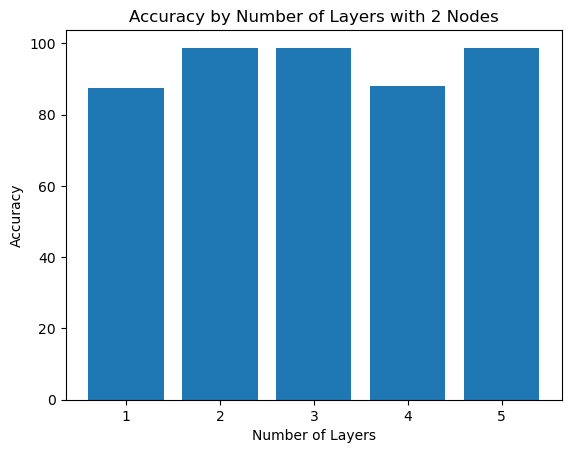

In [17]:
# Store scores for later reference
scores_2nodes = scores

# Plot the accuracy scores based on number of layers
plt.bar(num_layers, scores_2nodes)
plt.xlabel('Number of Layers')
plt.ylabel('Accuracy')
plt.title('Accuracy by Number of Layers with 2 Nodes')
plt.show()

This shows similar results for 2, 3, or 5 hidden layers based on the Hyperbolic Tangent algoirthm. Accuracy comes out very high at 98.75%.

#### Results from 3 nodes



In [12]:
scores = []

for num_layer in num_layers:
    model = Sequential()
    model.add(Dense(3, input_dim=2, activation='tanh'))
    for _ in range(num_layer-1):
        model.add(Dense(3, activation='tanh'))
    
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
    model.fit(X, y, batch_size=2, epochs=400)
    
    # Append accuracy to array
    scores.append(model.evaluate(X, y)[1]*100)

Epoch 1/400


c:\Users\jomors\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4771 - loss: 0.7005
Epoch 2/400
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5124 - loss: 0.7077
Epoch 3/400
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5806 - loss: 0.6923
Epoch 4/400
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6358 - loss: 0.6969
Epoch 5/400
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5173 - loss: 0.6916
Epoch 6/400
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6398 - loss: 0.6847
Epoch 7/400
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5461 - loss: 0.7073 
Epoch 8/400
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 874us/step - accuracy: 0.5262 - loss: 0.6992 
Epoch 9/400
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4968 - loss: 0.6991
Epoch 10/400
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 915us/step - accuracy: 0.5733 - loss: 0.6907
Epoch 11/400
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6647 - loss: 0.6879
Epoch 12/400
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.606

In [14]:
scores

[93.12499761581421,
 97.50000238418579,
 98.7500011920929,
 98.7500011920929,
 98.7500011920929]

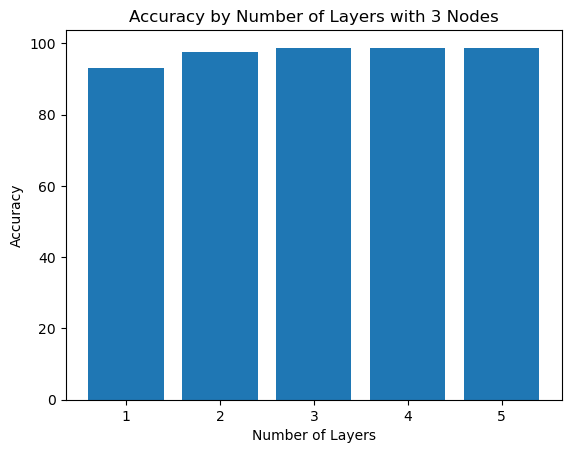

In [15]:
scores_3nodes = scores
plt.bar(num_layers, scores_3nodes)
plt.xlabel('Number of Layers')
plt.ylabel('Accuracy')
plt.title('Accuracy by Number of Layers with 3 Nodes')
plt.show()

Our highest results with 3 nodes come from 3+ layers. Results are similar to with 2 nodes.

#### Results from 4 nodes

In [18]:
scores = []

for num_layer in num_layers:
    model = Sequential()
    model.add(Dense(4, input_dim=2, activation='tanh'))
    for _ in range(num_layer-1):
        model.add(Dense(4, activation='tanh'))
    
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
    model.fit(X, y, batch_size=2, epochs=400)
    
    # Append accuracy to array
    scores.append(model.evaluate(X, y)[1]*100)

Epoch 1/400


c:\Users\jomors\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5363 - loss: 0.7216     
Epoch 2/400
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 845us/step - accuracy: 0.4804 - loss: 0.7183
Epoch 3/400
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5572 - loss: 0.7104
Epoch 4/400
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4738 - loss: 0.7344
Epoch 5/400
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4689 - loss: 0.7345
Epoch 6/400
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 795us/step - accuracy: 0.5655 - loss: 0.7061
Epoch 7/400
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 999us/step - accuracy: 0.5147 - loss: 0.7048
Epoch 8/400
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5316 - loss: 0.6973
Epoch 9/400
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6134 - loss: 0.6693
Epoch 10/400
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5204 - loss: 0.6837   
Epoch 11/400
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5626 - loss: 0.6758   
Epoch 12/400
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accu

In [19]:
scores

[93.75, 98.7500011920929, 98.7500011920929, 98.7500011920929, 98.7500011920929]

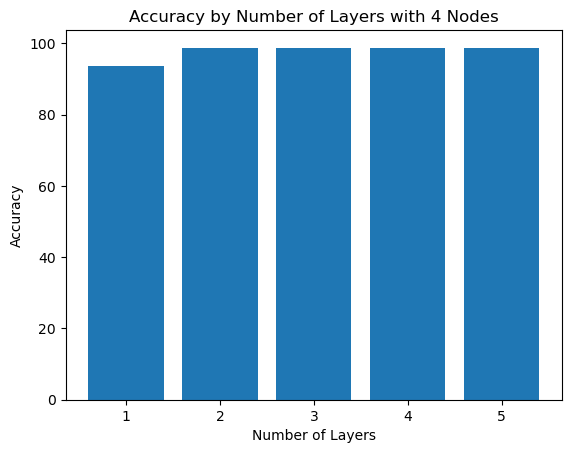

In [20]:
scores_4nodes = scores
plt.bar(num_layers, scores_4nodes)
plt.xlabel('Number of Layers')
plt.ylabel('Accuracy')
plt.title('Accuracy by Number of Layers with 4 Nodes')
plt.show()

The results here show high accuracy with 2 to 5 layers, again mathching the 98.75% of previous evaluations. Going with the concept of less is more, I am going to move forward with 3 layers (consistent across all 3 sets of models) and 2 nodes per layer.

#### Cycling thorugh Activation Functions

In this section, we will fix the layers and nodes at 3 and 2 repectively, and cycle through different activation functions.

In [23]:
act_funcs = ['relu', 'sigmoid', 'tanh', 'softmax', 'linear', 'elu', 'selu', 'softplus', 'softsign', 'hard_sigmoid', 'exponential']

scores = []

for act_func in act_funcs:
    model = Sequential()
    # Add first layer
    model.add(Dense(2, input_dim=2, activation=act_func))

    # Add three hidden layers
    model.add(Dense(2, activation=act_func))
    model.add(Dense(2, activation=act_func))
    model.add(Dense(2, activation=act_func))

    # Add output layer
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
    model.fit(X, y, batch_size=2, epochs=400)

    # Append accuracy to array
    scores.append(model.evaluate(X, y)[1]*100)

Epoch 1/400


c:\Users\jomors\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5601 - loss: 0.6913
Epoch 2/400
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6889 - loss: 0.6708
Epoch 3/400
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7262 - loss: 0.6442
Epoch 4/400
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7474 - loss: 0.6345  
Epoch 5/400
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6581 - loss: 0.6313
Epoch 6/400
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6528 - loss: 0.6303
Epoch 7/400
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6791 - loss: 0.6017
Epoch 8/400
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 921us/step - accuracy: 0.7305 - loss: 0.5631
Epoch 9/400
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 977us/step - accuracy: 0.6899 - loss: 0.5706
Epoch 10/400
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5641 - loss: 0.6184   
Epoch 11/400
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7260 - loss: 0.5552
Epoch 12/400
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.

In [24]:
scores

[74.37499761581421,
 60.00000238418579,
 87.5,
 50.0,
 50.0,
 86.87499761581421,
 92.5000011920929,
 68.75,
 87.5,
 50.0,
 50.0,
 50.0]

C:\Users\jomors\AppData\Local\Temp\ipykernel_22320\2882831902.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(act_funcs, rotation=30)


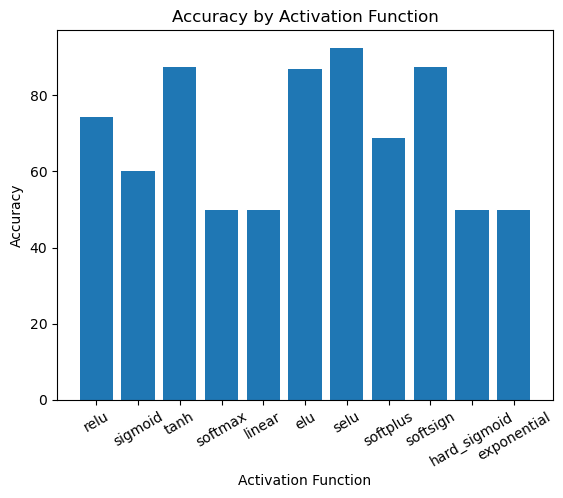

In [32]:
scores_funcs = scores

fig, ax = plt.subplots()
ax.bar(act_funcs, scores_funcs)
ax.set_xlabel('Activation Function')
ax.set_xticklabels(act_funcs, rotation=30)
ax.set_ylabel('Accuracy')
plt.title('Accuracy by Activation Function')
plt.show()

With the above, we see the best results with a __selu__ algorithm, followed by __tanh__, the function used in our previous efforts, __elu__, and __softsign__. From here, we will move forward with __selu__.

#### Optimizers

Sticking with __selu__, 2 hidden layers, and 2 nodes in each layer, we can now cycle through optimizers and analyze the loss.

In [33]:
optimizers = ['sgd', 'rmsprop', 'adagrad', 'adadelta', 'adam', 'adamax', 'nadam']

scores = []

for opt in optimizers:
    model = Sequential()
    # Add first layer
    model.add(Dense(2, input_dim=2, activation='selu'))

    # Add three hidden layers
    model.add(Dense(2, activation='selu'))
    model.add(Dense(2, activation='selu'))
    model.add(Dense(2, activation='selu'))

    # Add output layer
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer=opt)
    model.fit(X, y, batch_size=2, epochs=400)

    # Append accuracy to array
    scores.append(model.evaluate(X, y))

Epoch 1/400


c:\Users\jomors\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7134  
Epoch 2/400
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 873us/step - loss: 0.7082
Epoch 3/400
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6858
Epoch 4/400
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6541
Epoch 5/400
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6500
Epoch 6/400
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 810us/step - loss: 0.6442
Epoch 7/400
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6638
Epoch 8/400
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6048  
Epoch 9/400
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 860us/step - loss: 0.6435
Epoch 10/400
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6285
Epoch 11/400
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5859
Epoch 12/400
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6329
Epoch 13/400
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6175
Epoch 14/400
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6290
Epoch 15/400
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 812us/step - loss: 0.5786
Epoc

In [34]:
scores

[0.05980195477604866,
 0.22596275806427002,
 0.6861329674720764,
 0.7012993097305298,
 0.12681254744529724,
 0.24772480130195618,
 0.030682284384965897]

C:\Users\jomors\AppData\Local\Temp\ipykernel_22320\1440464884.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(optimizers, rotation=30)


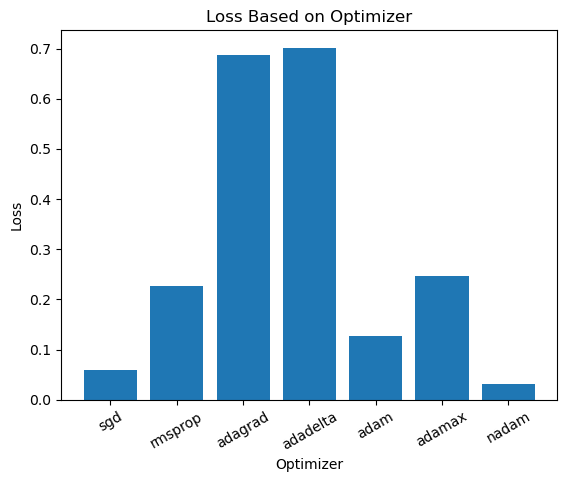

In [35]:
loss_opts = scores

fig, ax = plt.subplots()
ax.bar(optimizers, loss_opts)
ax.set_xlabel('Optimizer')
ax.set_xticklabels(optimizers, rotation=30)
ax.set_ylabel('Loss')
plt.title('Loss Based on Optimizer')
plt.show()

Since we are looking for the lowest loss possible, the __nadam__ optimizer wins out here. Now we can do a final analysis based on all of the above selections.

In [36]:
model = Sequential()

# Add first layer
model.add(Dense(2, input_dim=2, activation='selu'))

# Add three hidden layers
model.add(Dense(2, activation='selu'))
model.add(Dense(2, activation='selu'))
model.add(Dense(2, activation='selu'))

# Add output layer
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='nadam', metrics=['accuracy'])
model.fit(X, y, batch_size=2, epochs=400)

Epoch 1/400


c:\Users\jomors\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5601 - loss: 1.1417
Epoch 2/400
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5867 - loss: 0.9696
Epoch 3/400
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4824 - loss: 1.0223
Epoch 4/400
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6218 - loss: 0.7891
Epoch 5/400
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6177 - loss: 0.7531
Epoch 6/400
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5784 - loss: 0.7132
Epoch 7/400
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6388 - loss: 0.6669
Epoch 8/400
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6385 - loss: 0.6653
Epoch 9/400
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 900us/step - accuracy: 0.6913 - loss: 0.6244
Epoch 10/400
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7081 - loss: 0.6203
Epoch 11/400
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7244 - loss: 0.6125  
Epoch 12/400
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7891 

In [37]:
scores = model.evaluate(X, y)
scores, model.metrics_names

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 645us/step - accuracy: 0.8801 - loss: 0.2975


([0.30221015214920044, 0.8812500238418579], ['loss', 'compile_metrics'])

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


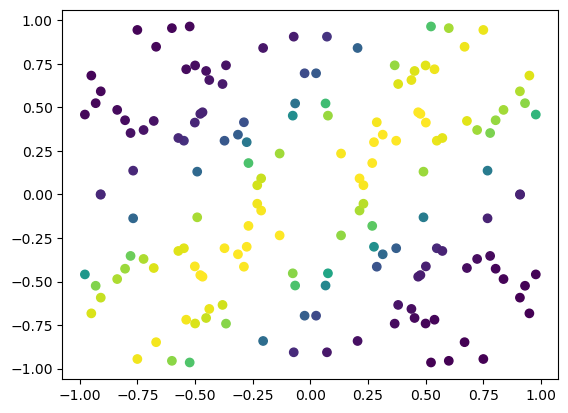

In [38]:
plt.scatter(*zip(*X), c=model.predict(X))

#### Observation

I am noticing that although I am selecitng the various parameters that perform best after the various cycles, final loss and accuracy are not near as good as what I was seeing in the previous cycles. The scatter plot certainly implies a lack of accuracy as well. My thought is that there is something not correct in my for loops in the above sections, and the models resulting from them are not correct.

## Part 2 - BYOD

In [40]:
import pandas as pd

# Load the dataset
apples = pd.read_csv('apple_quality.csv')
# Drop the unneeded ID
apples = apples.drop(['A_id'], axis = 1)

# Check the number of good and bad apples
apples.Quality.value_counts()

Quality
good    2004
bad     1996
Name: count, dtype: int64

In [41]:
# Convert the Quality field to 1 for good and 0 for bad.
apples['Quality'] = np.where(apples['Quality'] == 'good', 1, 0)

# Check the number of 1s and 0s - this shoudl align to good and bad above
apples.Quality.value_counts()

Quality
1    2004
0    1996
Name: count, dtype: int64

In [45]:
apples.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,1
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,1
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,0
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,1
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,1


In [48]:
# Create a set of X values by dropping the Quality classifier
XX = apples.drop(['Quality'], axis = 1)
# Drop the values least likely to impact quality
XX = XX.drop(['Size', 'Weight'], axis = 1)
# Convert the dataframe to a numpy array
XX = XX.values
XX.shape

(4000, 5)

In [50]:
# Create a set of y values by selecting the Quality classifier
yy = apples['Quality']
# Convert the dataframe to a numpy array
yy = yy.values
yy

array([1, 1, 0, ..., 0, 1, 1])

In [74]:
# initialize different optimizers
from keras.optimizers import SGD, RMSprop, Adagrad

sgd = SGD(learning_rate=0.01)
rmsprop = RMSprop(learning_rate=0.01)
adagrad = Adagrad(learning_rate=0.01)


In [84]:
# Build a Sequential model
model = Sequential()

# Add first layer
model.add(Dense(12, input_dim=5, activation='relu'))

# Add two hidden layers
model.add(Dense(12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(12, activation='relu'))
#model.add(Dense(12, activation='relu'))

# Add output layer
model.add(Dense(1, activation='sigmoid'))

#model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#model.compile(loss='binary_crossentropy', optimizer='adamw', metrics=['accuracy'])
#model.compile(loss='binary_crossentropy', optimizer='nadam', metrics=['accuracy'])

model.fit(XX, yy, batch_size=4, epochs=800)


Epoch 1/800
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6528 - loss: 0.6184
Epoch 2/800
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7594 - loss: 0.4814
Epoch 3/800
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7913 - loss: 0.4436
Epoch 4/800
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7986 - loss: 0.4294
Epoch 5/800
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7914 - loss: 0.4166
Epoch 6/800
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8095 - loss: 0.4018
Epoch 7/800
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8130 - loss: 0.3948
Epoch 8/800
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8184 - loss: 0.3817
Epoch 9/800
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8170 - loss: 0.3924
Epoch 10/800
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8274 - loss: 0.3755
Epoch 11/800
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8276 - loss: 0.3785
Epoch 12/800
1000/1

In [85]:
scores = model.evaluate(XX, yy)
scores, model.metrics_names

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8846 - loss: 0.2301


([0.23228037357330322, 0.890250027179718], ['loss', 'compile_metrics'])

#### Results
In my final run, I obtained an __Accuracy__ of __0.8903__, or __89.03%__, and a __Loss__ of __0.2323__. I completed a total of 15 runs of the analysis, with #15 being a repeat of the parameters for #13 to validate the outcome. These are the parameters used in my final run:

* Activation function = 'relu' 
* Number of hidden layers = 3
* Number of nodes on each layer = 12
* Optimizer = 'adam'
* Batch Size = 4
* Epochs = 800

Some observations:
- Increasing epochs from 800 to 1000 resulted in lower accuracy and higher loss, indicating there is a limit to how many iterations should be run.
- Adding a fourth hidden layer also decreased accuracy and increased loss. However, moving from 2 hiiden lyers to 3 had a distinct improvement.
- Increasing nodes on the layers from 2 to, ultimately, 12 had the biggest impact in improving accuracy and loss, followe by increasing epochs from 200 to 800.